In [17]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import os 
import sys
sys.path.append("../")
import seaborn as sns 
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

# Importamos las clases
# -----------------------------------------------------------------------
from src import soporte_logistica_preprocesamiento as sl
from src import soporte_feature_scaling as sf
from src import soporte_encoding_logistica as se
from src import soporte_nulos as sn
from src import soporte_logistica_ensamble as sc


# Ignorar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
df = pd.read_pickle("../datos_pkl/datos_preprocesados.pkl")
df.head()

,Age,DistanciaDesdeCasa,Educación,Gender,JobLevel,MonthlyIncome,IncrementoPorcentajeSalario,NivelDeOpcionesAcciones,VecesDeCapacitaciónAñoPasado,AñosEnLaEmpresa,...,Departamento_Human Resources,Departamento_Research & Development,Departamento_Sales,CampoDeEstudio_Human Resources,CampoDeEstudio_Life Sciences,CampoDeEstudio_Marketing,CampoDeEstudio_Medical,CampoDeEstudio_Other,CampoDeEstudio_Technical Degree,Deserción
0,1.552222,-0.390933,-0.884892,0.152824,0.150177,1.407855,-1.153537,-0.932989,2.489867,-0.983278,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,-0.651136,0.101538,-1.860378,0.152824,0.150177,-0.491295,2.142180,0.244996,0.152368,-0.329043,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,-0.540968,0.963362,1.066081,0.166127,0.157408,2.729411,-0.054965,2.600968,-0.626798,-0.329043,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.120039,-0.883404,2.041567,0.166127,0.141593,0.387756,-1.153537,2.600968,1.710701,0.161633,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,-0.540968,0.101538,-1.860378,0.166127,0.150177,-0.884231,-0.878894,1.422982,-0.626798,-0.165484,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


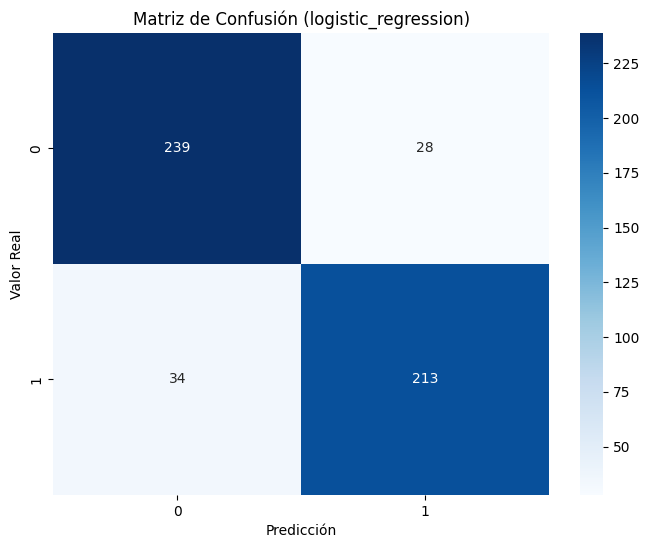

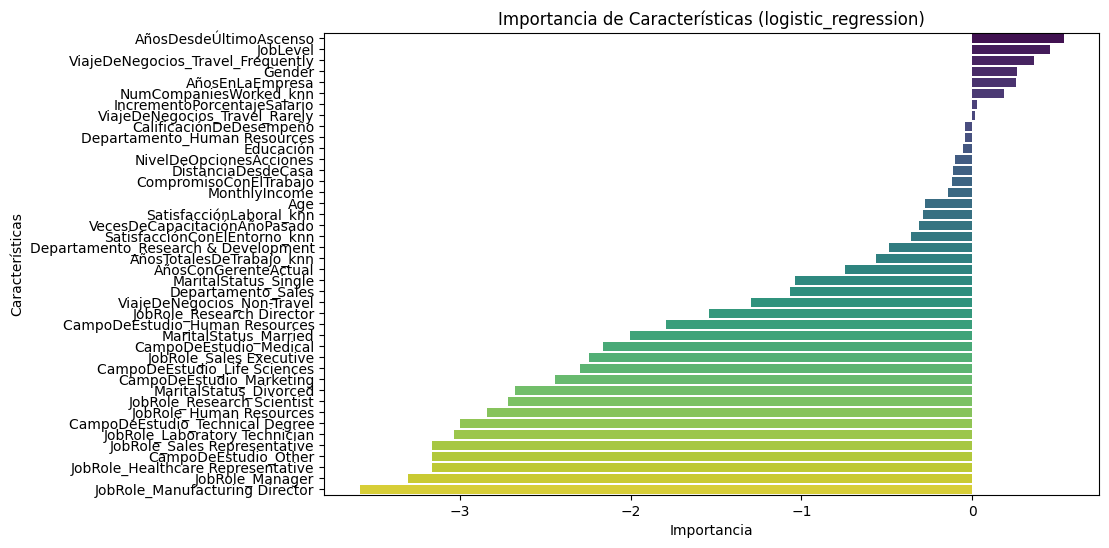

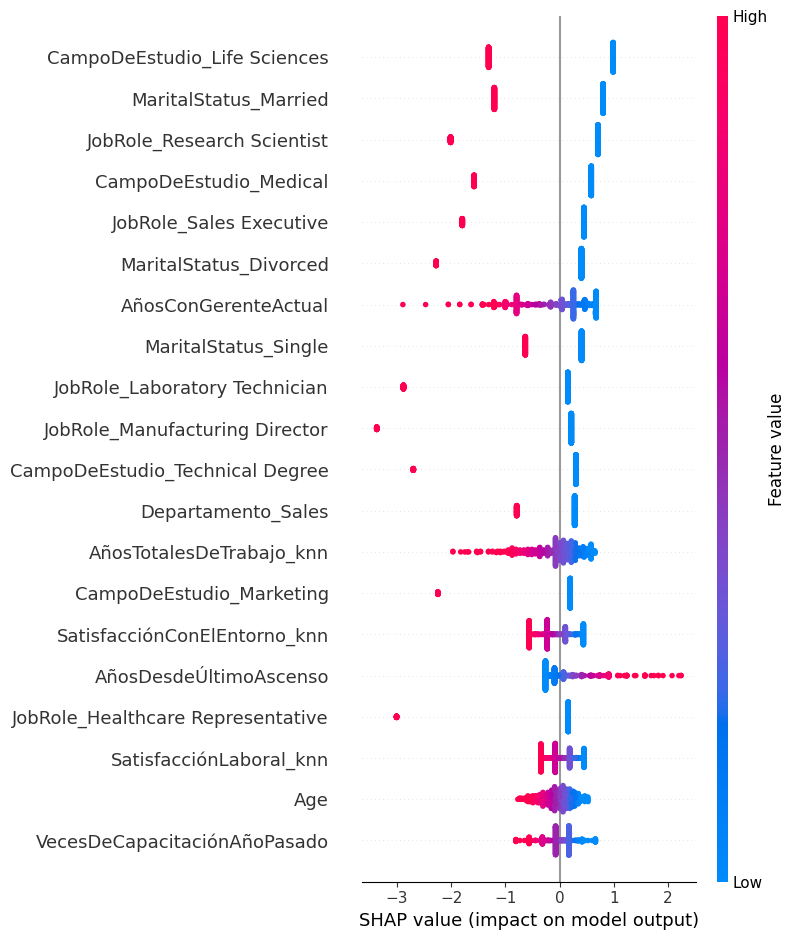

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.881092,0.881499,0.881092,0.881081,0.762233,0.943969,0.003958,8.0,NaN,NaN,regresion logistica
test,0.879377,0.879475,0.879377,0.879306,0.758169,0.937967,NaN,NaN,0.003958,8.0,regresion logistica


In [19]:
# instanciamos la clase de regresión logistica
logistica = sc.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Deserción")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

logistica.plot_matriz_confusion("logistic_regression")
logistica.importancia_predictores(modelo_nombre ='logistic_regression')
logistica.plot_shap_summary(modelo_nombre="logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = logistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados["modelo"] = "regresion logistica"
df_resultados

El mejor modelo es DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=10)


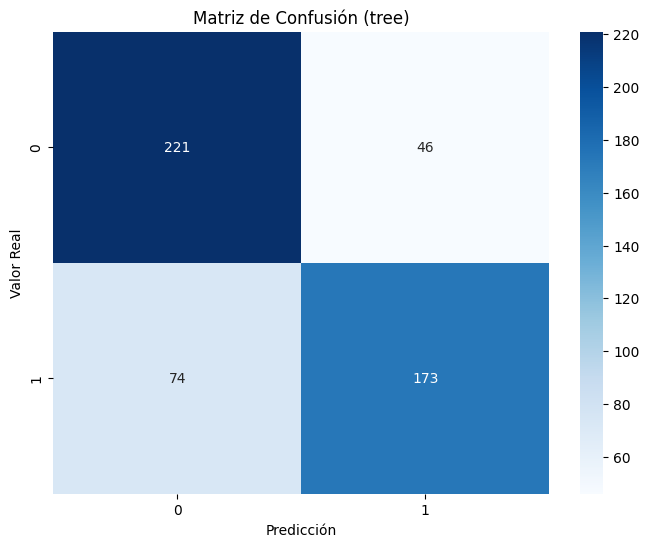

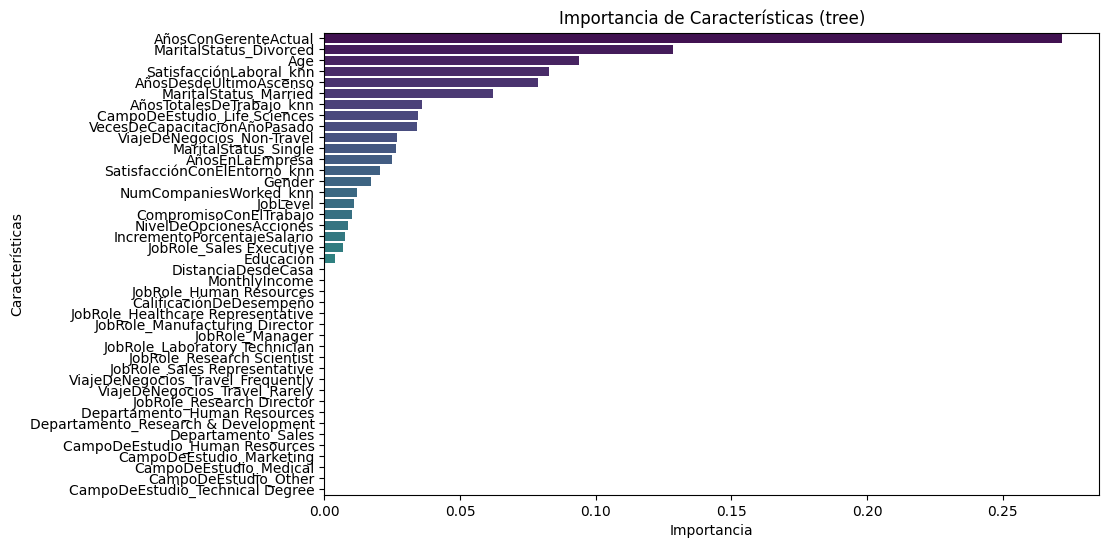

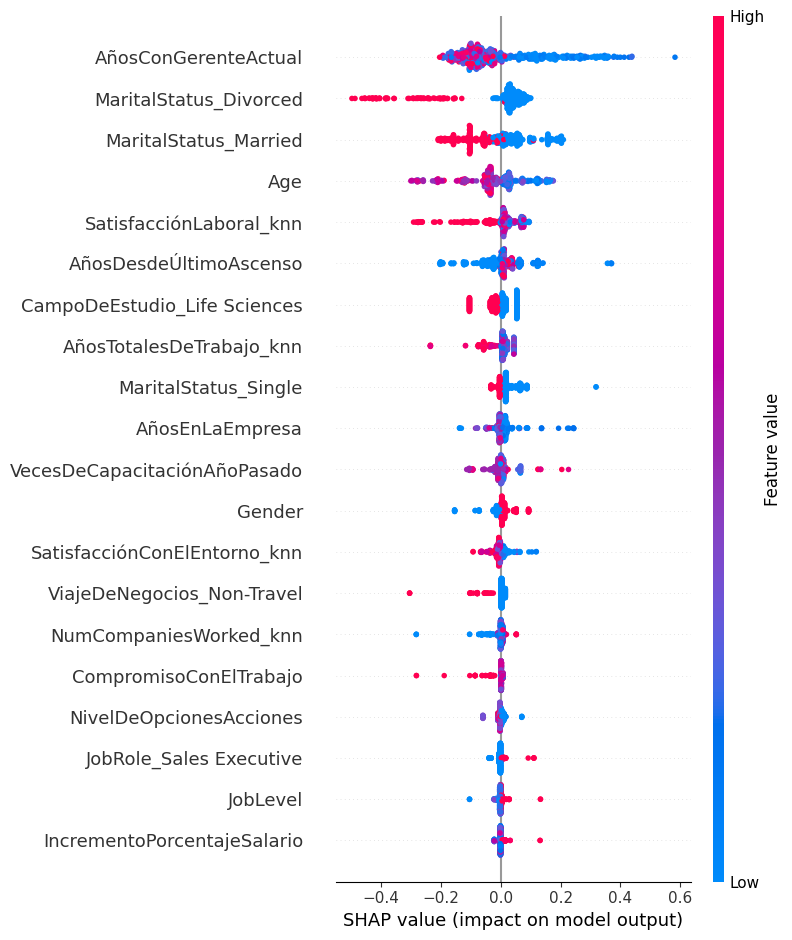

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.802632,0.806027,0.802632,0.802213,0.605619,0.890049,0.004987,8.0,NaN,NaN,decision tree
test,0.766537,0.768760,0.766537,0.765339,0.530372,0.840998,NaN,NaN,0.004987,8.0,decision tree
train,0.881092,0.881499,0.881092,0.881081,0.762233,0.943969,0.003958,8.0,NaN,NaN,regresion logistica
test,0.879377,0.879475,0.879377,0.879306,0.758169,0.937967,NaN,NaN,0.003958,8.0,regresion logistica


In [20]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("tree")

logistica.plot_matriz_confusion("tree")
logistica.importancia_predictores(modelo_nombre ='tree')
logistica.plot_shap_summary(modelo_nombre="tree")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree = logistica.calcular_metricas(modelo_nombre =  "tree" )
df_resultados_tree["modelo"] = "decision tree"
df_resultados_final = pd.concat([df_resultados_tree, df_resultados], axis = 0)
df_resultados_final

El mejor modelo es RandomForestClassifier(max_depth=4, max_features=0.8, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=150)


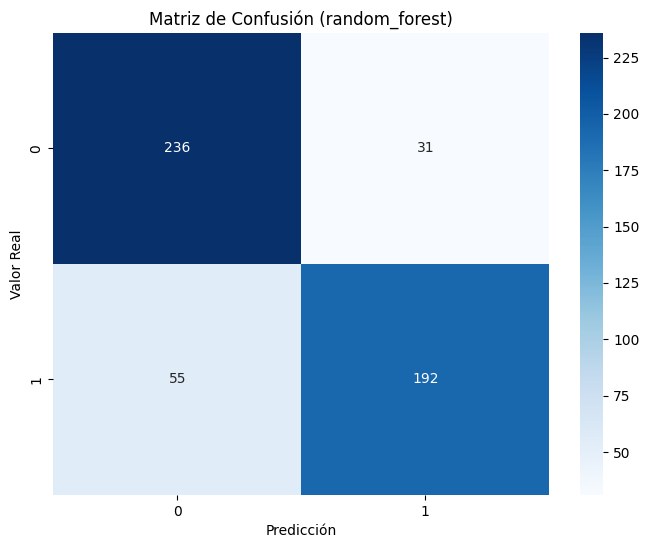

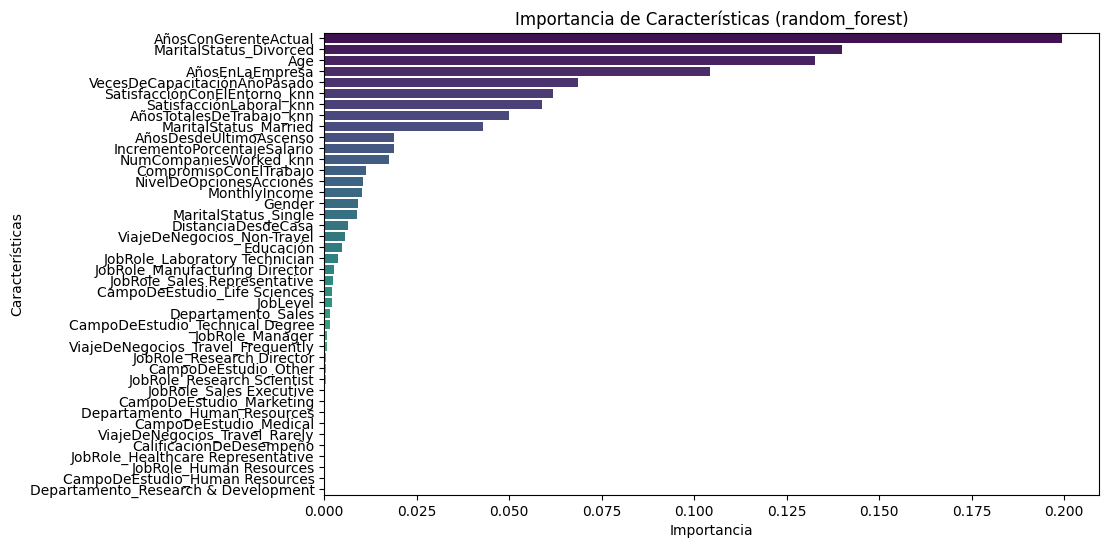

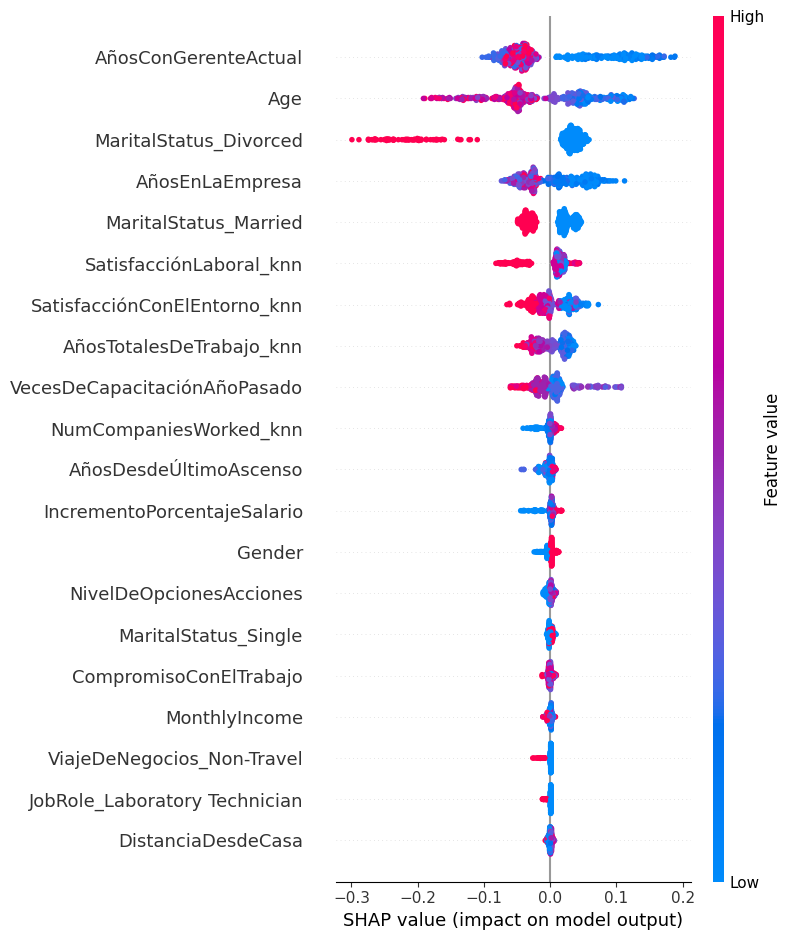

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.802632,0.806027,0.802632,0.802213,0.605619,0.890049,0.004987,8.0,NaN,NaN,decision tree
test,0.766537,0.768760,0.766537,0.765339,0.530372,0.840998,NaN,NaN,0.004987,8.0,decision tree
train,0.881092,0.881499,0.881092,0.881081,0.762233,0.943969,0.003958,8.0,NaN,NaN,regresion logistica
test,0.879377,0.879475,0.879377,0.879306,0.758169,0.937967,NaN,NaN,0.003958,8.0,regresion logistica
train,0.863548,0.866352,0.863548,0.863354,0.727298,0.928363,0.079785,NaN,NaN,NaN,random_forest
test,0.832685,0.835019,0.832685,0.832011,0.663638,0.900120,NaN,NaN,0.079785,NaN,random_forest


In [21]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("random_forest")

logistica.plot_matriz_confusion("random_forest")
logistica.importancia_predictores(modelo_nombre ='random_forest')
logistica.plot_shap_summary(modelo_nombre ='random_forest')

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_forest = logistica.calcular_metricas(modelo_nombre =  "random_forest" )
df_resultados_forest["modelo"] = "random_forest"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_forest], axis = 0)
df_resultados_final

El mejor modelo es GradientBoostingClassifier(max_depth=5, max_features=0.8, min_samples_leaf=5,
                           min_samples_split=10, n_estimators=150,
                           subsample=0.9)


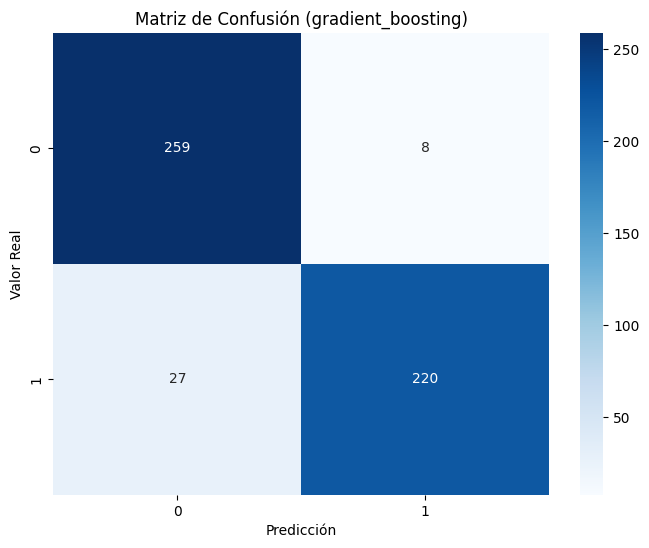

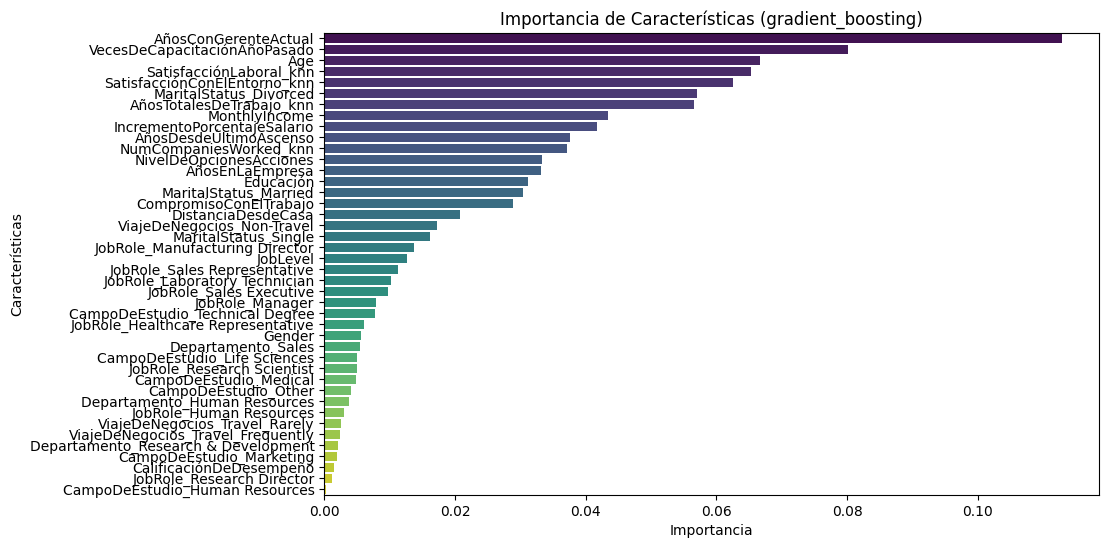

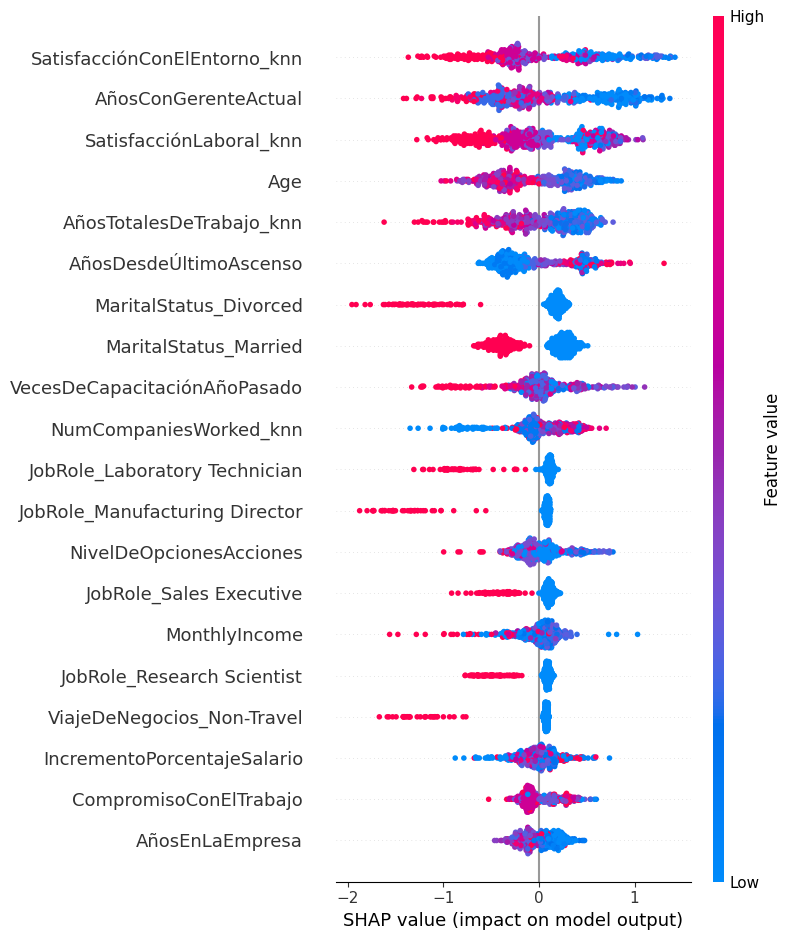

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.802632,0.806027,0.802632,0.802213,0.605619,0.890049,0.004987,8.0,NaN,NaN,decision tree
test,0.766537,0.768760,0.766537,0.765339,0.530372,0.840998,NaN,NaN,0.004987,8.0,decision tree
train,0.881092,0.881499,0.881092,0.881081,0.762233,0.943969,0.003958,8.0,NaN,NaN,regresion logistica
test,0.879377,0.879475,0.879377,0.879306,0.758169,0.937967,NaN,NaN,0.003958,8.0,regresion logistica
train,0.863548,0.866352,0.863548,0.863354,0.727298,0.928363,0.079785,NaN,NaN,NaN,random_forest
test,0.832685,0.835019,0.832685,0.832011,0.663638,0.900120,NaN,NaN,0.079785,NaN,random_forest
train,0.999025,0.999027,0.999025,0.999025,0.998051,1.000000,0.022940,8.0,NaN,NaN,gradient_boosting
test,0.931907,0.934099,0.931907,0.931715,0.863213,0.964806,NaN,NaN,0.022940,8.0,gradient_boosting


In [22]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("gradient_boosting")

logistica.plot_matriz_confusion("gradient_boosting")
logistica.importancia_predictores(modelo_nombre ='gradient_boosting')
logistica.plot_shap_summary(modelo_nombre="gradient_boosting")


# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient = logistica.calcular_metricas(modelo_nombre =  "gradient_boosting" )
df_resultados_gradient["modelo"] = "gradient_boosting"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_gradient], axis = 0)
df_resultados_final


El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


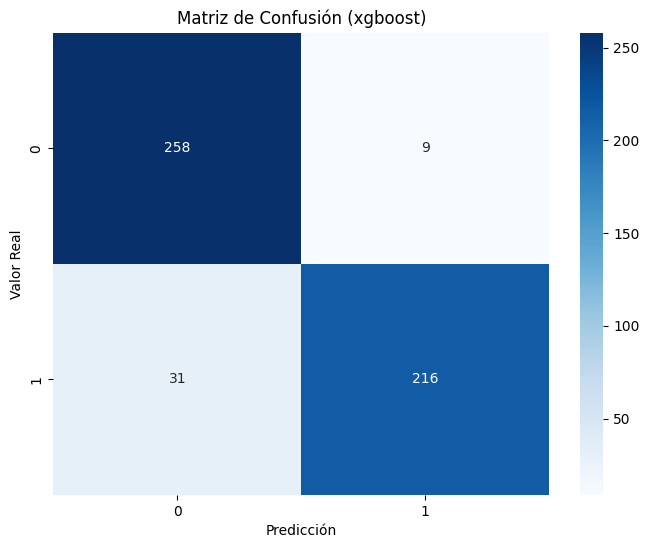

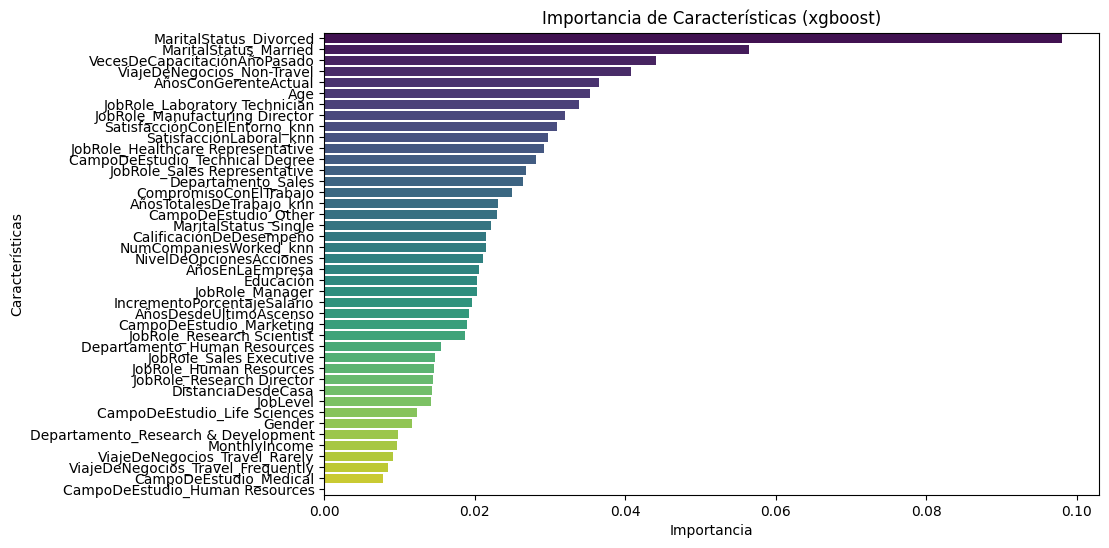

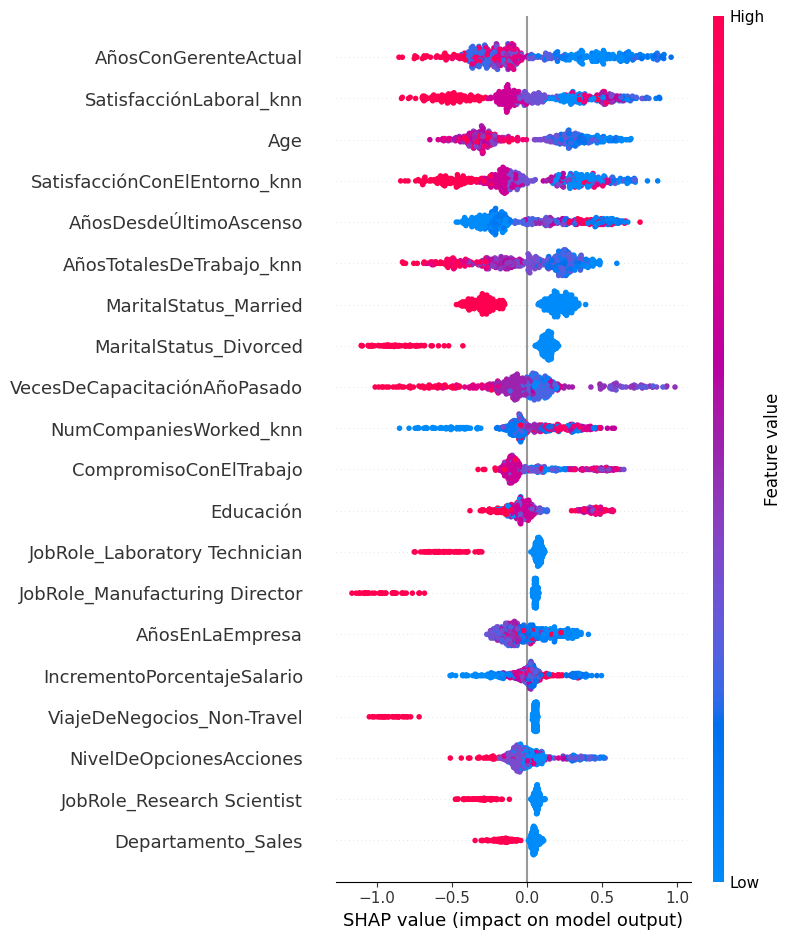

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.802632,0.806027,0.802632,0.802213,0.605619,0.890049,0.004987,8.0,NaN,NaN,decision tree
test,0.766537,0.768760,0.766537,0.765339,0.530372,0.840998,NaN,NaN,0.004987,8.0,decision tree
train,0.881092,0.881499,0.881092,0.881081,0.762233,0.943969,0.003958,8.0,NaN,NaN,regresion logistica
test,0.879377,0.879475,0.879377,0.879306,0.758169,0.937967,NaN,NaN,0.003958,8.0,regresion logistica
train,0.863548,0.866352,0.863548,0.863354,0.727298,0.928363,0.079785,NaN,NaN,NaN,random_forest
test,0.832685,0.835019,0.832685,0.832011,0.663638,0.900120,NaN,NaN,0.079785,NaN,random_forest
train,0.999025,0.999027,0.999025,0.999025,0.998051,1.000000,0.022940,8.0,NaN,NaN,gradient_boosting
test,0.931907,0.934099,0.931907,0.931715,0.863213,0.964806,NaN,NaN,0.022940,8.0,gradient_boosting
train,0.949318,0.951102,0.949318,0.949284,0.898687,0.989809,0.032912,NaN,NaN,NaN,xgboost
test,0.922179,0.925058,0.922179,0.921905,0.843600,0.962016,NaN,NaN,0.032912,NaN,xgboost


In [23]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("xgboost")

logistica.plot_matriz_confusion("xgboost")
logistica.importancia_predictores(modelo_nombre ='xgboost')
logistica.plot_shap_summary(modelo_nombre="xgboost")


# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = logistica.calcular_metricas(modelo_nombre =  "xgboost" )
df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_xgboost], axis = 0)
df_resultados_final

In [24]:
df_resultados_colores = df_resultados_final.copy()
df_resultados_colores.reset_index(inplace = True, drop = True)
df_resultados_colores = df_resultados_colores.style.apply(sc.color_filas_por_modelo, axis=1)
df_resultados_colores

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
0,0.802632,0.806027,0.802632,0.802213,0.605619,0.890049,0.004987,8.000000,nan,nan,decision tree
1,0.766537,0.768760,0.766537,0.765339,0.530372,0.840998,nan,nan,0.004987,8.000000,decision tree
2,0.881092,0.881499,0.881092,0.881081,0.762233,0.943969,0.003958,8.000000,nan,nan,regresion logistica
3,0.879377,0.879475,0.879377,0.879306,0.758169,0.937967,nan,nan,0.003958,8.000000,regresion logistica
4,0.863548,0.866352,0.863548,0.863354,0.727298,0.928363,0.079785,nan,nan,nan,random_forest
5,0.832685,0.835019,0.832685,0.832011,0.663638,0.900120,nan,nan,0.079785,nan,random_forest
6,0.999025,0.999027,0.999025,0.999025,0.998051,1.000000,0.022940,8.000000,nan,nan,gradient_boosting
7,0.931907,0.934099,0.931907,0.931715,0.863213,0.964806,nan,nan,0.022940,8.000000,gradient_boosting
8,0.949318,0.951102,0.949318,0.949284,0.898687,0.989809,0.032912,nan,nan,nan,xgboost
9,0.922179,0.925058,0.922179,0.921905,0.843600,0.962016,nan,nan,0.032912,nan,xgboost
